In [28]:
import time
import sys
import matplotlib.pyplot as plt
import numpy as np

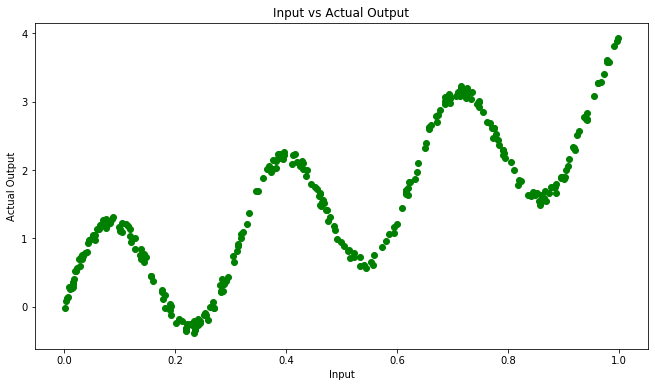

In [29]:
x_i = np.random.uniform(0,1,300)
v_i = np.random.uniform(-0.1, 0.1, 300)
d_i = np.sin(20 * x_i) + (3 * x_i) + v_i
input_size = 300

plt.figure(figsize=(11,6))
plt.xlabel('Input')
plt.ylabel('Actual Output')
plt.title('Input vs Actual Output')
plt.scatter(x_i, d_i,c='green')
plt.show()

In [30]:
tanh_act_func = lambda x : np.tanh(x)
output_act_func = lambda x : x
df_tanh_act_func = lambda x : 1 - (np.tanh(x)**2)
df_output_act_func = lambda x : 1

neuron_size = 24
weights_hidden_neuron = np.random.normal(0,1/np.sqrt(24),neuron_size)
weights_output_neruon = np.random.normal(0,1/np.sqrt(24),neuron_size)
bias_hidden_neuron = np.random.normal(0,1,neuron_size)
bias_output_neruon = np.random.normal(-1,1,1)

weights_l1 = np.concatenate((bias_hidden_neuron.reshape(24,1), weights_hidden_neuron.reshape(24,1)), axis = 1)
weights_l2 = np.concatenate((bias_output_neruon.reshape(1,1), weights_output_neruon.reshape(1,24)), axis =1) 
learning_rate = .01

Training terminated after 10001 epochs with a learning rate of 0.009000000000000001
Mean Squared Error after termination is 0.0026940208482108367


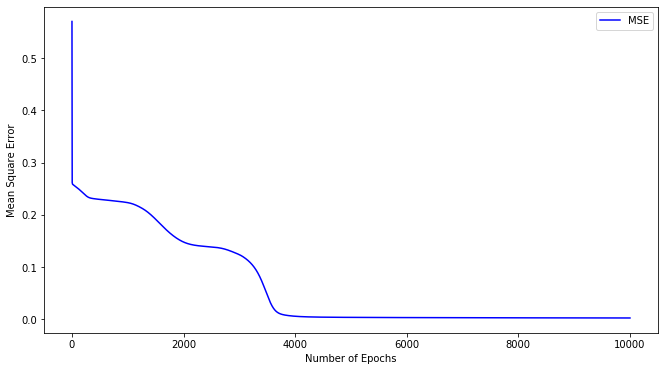

In [31]:
mean_squared_error = []
epoch = 0
unit_vector = np.array([1]).reshape(1,1)

while(epoch <= 10000):
    local_induced_values_1 = []
    outputs_1 = []
    local_induced_values_2 = []
    outputs_2 = []
    for i in range(input_size):
        
        input_vector_1 = np.vstack((unit_vector,  np.array(x_i[i]).reshape(1, 1)))
        local_induced_val_1 = np.dot(weights_l1, input_vector_1)
        output_value_1 = tanh_act_func(local_induced_val_1)
        local_induced_values_1.append(local_induced_val_1)
        outputs_1.append(output_value_1)
    
        input_vector_2 = np.vstack((unit_vector, output_value_1))
        local_induced_val_2 = np.dot(weights_l2, input_vector_2) 
        output_value_2 = output_act_func(local_induced_val_2)
        local_induced_values_2.append(local_induced_val_2)
        outputs_2.append(output_value_2)
                         
        d_2 = (d_i[i] - output_value_2) 
        d_1 = np.multiply((np.dot(np.transpose(weights_l2), d_2))[1:,:], df_tanh_act_func(local_induced_val_1))
        
        weights_l1 = weights_l1 + (learning_rate * (np.dot(d_1, input_vector_1.transpose())))
        weights_l2 = weights_l2 + (learning_rate * (np.dot(d_2, input_vector_2.transpose())))
    
    sum = 0 

    for i in range(input_size):
        sum += ((d_i[i] - outputs_2[i])**2)
    mse = (sum / (input_size*2))
    mean_squared_error.append(mse[0,0])
    
    
    if epoch != 0:
        if mean_squared_error[epoch] > mean_squared_error[epoch - 1]:
            learning_rate = learning_rate * 0.9
        if mean_squared_error[epoch]  <= 0.001:
            break
    
    epoch+=1
                
print(f"Training terminated after {epoch} epochs with a learning rate of {learning_rate}")
print(f"Mean Squared Error after termination is {mean_squared_error[-1]}")

plt.figure(figsize=(11,6))
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Square Error')
plt.plot(range(len(mean_squared_error)), mean_squared_error, c = 'blue', label = 'MSE')
plt.legend(loc = 'best')
plt.show()

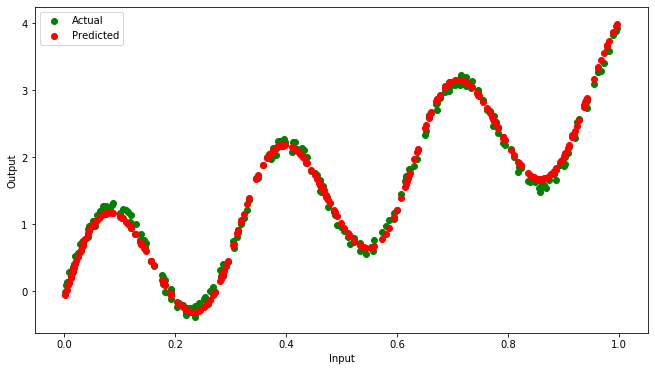

In [32]:
output_final = []
for i in range(input_size):
    input_vector_1 = np.vstack((unit_vector, np.array(x_i[i]).reshape(1, 1))) 
    induced_value_1 = np.dot(weights_l1, input_vector_1)
    output_1 = tanh_act_func(induced_value_1)
    
    input_vector_2 = np.vstack((unit_vector, output_1))
    induced_value_2 = np.dot(weights_l2, input_vector_2) 
    output_2 = output_act_func(induced_value_2)
    output_final.append(output_2[0,0])

plt.figure(figsize=(11,6))
plt.ylabel('Output')
plt.xlabel('Input')
plt.scatter(x_i,d_i, c = 'green', label = 'Actual')
plt.scatter(x_i,output_final, c = 'red', label = 'Predicted')
plt.legend(loc = 'best')
plt.show()